In [1]:
from pathlib import Path
from conllu import parse, TokenList
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import numpy as np


notebook_path = Path().resolve()
code_folder = notebook_path.parent
treebanks_folder = code_folder / "treebanks"
print(treebanks_folder)

nltk.download('stopwords')
nltk.download('punkt')
norwegian_stop_words = set(stopwords.words("norwegian"))

/Users/liamo/Desktop/Norwegian-Dialect-Classification/treebanks


[nltk_data] Downloading package stopwords to /Users/liamo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/liamo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:

def parse_conll_file(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        conll_data = file.read()
        return parse(conll_data)

In [3]:
#In this function we will have a nested list all_parsed_data (nested list of sentences where the outter list is a specific dialect while the inner list is the sentences per dialect)
#The second list all_parsed_data_filtered is the filtered version of the same thing
#Each element in the inner list is a token and there is meta data at the end
#Each token has associated info lemma,upos,etc
all_parsed_data = []
print(treebanks_folder)

for file_path in treebanks_folder.glob("*.conll"):
    parsed_data = parse_conll_file(file_path)
    all_parsed_data.append(parsed_data)


if all_parsed_data:
    first_file_parsed_data = all_parsed_data[0][1]
    serialized = first_file_parsed_data.serialize()
    print(first_file_parsed_data)
    print(serialized)
    token = first_file_parsed_data[0]
    # print(token['id'])
    # print(token['form'])
    # print(token['lemma'])
    # print(token['upos'])
else:
    all_parsed_data = []

/Users/liamo/Desktop/Norwegian-Dialect-Classification/treebanks
TokenList<frå, #, Førde, ?, metadata={text: "frå # Førde ?", segstart: "10.891", segstop: "11.983", file: "foerde_uib_05", speaker: "int1", id: "2"}>
# text = frå # Førde ?
# segstart = 10.891
# segstop = 11.983
# file = foerde_uib_05
# speaker = int1
# id = 2
1	frå	frå	prep	prep	_	0	FRAG	_	_
2	#	#	pause	pause	_	3	IK	_	_
3	Førde	Førde	subst	subst	prop	1	PUTFYLL	_	_
4	?	$?	clb	clb	<spm>	1	IP	_	_




In [4]:
##V2
from collections import Counter


#Just some testing things not important really
vocabularies = []

for dialect in all_parsed_data:
  vocab = []
  for sentence in dialect:
    words = [token['form'] for token in sentence]

    vocab.extend(words)
  vocabularies.append(vocab)

print(len(vocabularies))


scores = []

for i in range(len(vocabularies)):
  score_row = []
  for j in range(len(vocabularies)):
    dia1 = vocabularies[i]
    dia2 = vocabularies[j]
    counter1 = Counter(dia1)
    counter2 = Counter(dia2)
    dupes = counter1 & counter2
    score_row.append(len(list(dupes.elements()))/max(len(dia1),len(dia2)))
  scores.append(score_row)

scores = np.round(scores, decimals=2)

names = ["Aal","Austevell", "Bardu", "Brandu", "Eidsberg","Fana","Farsund","Flakstad","Foerde","Giske","Gol", "Hemsedal","Herad","Hjartdal","Hoeyanger","Lierne","Vardoe"]

19


(19, 19)


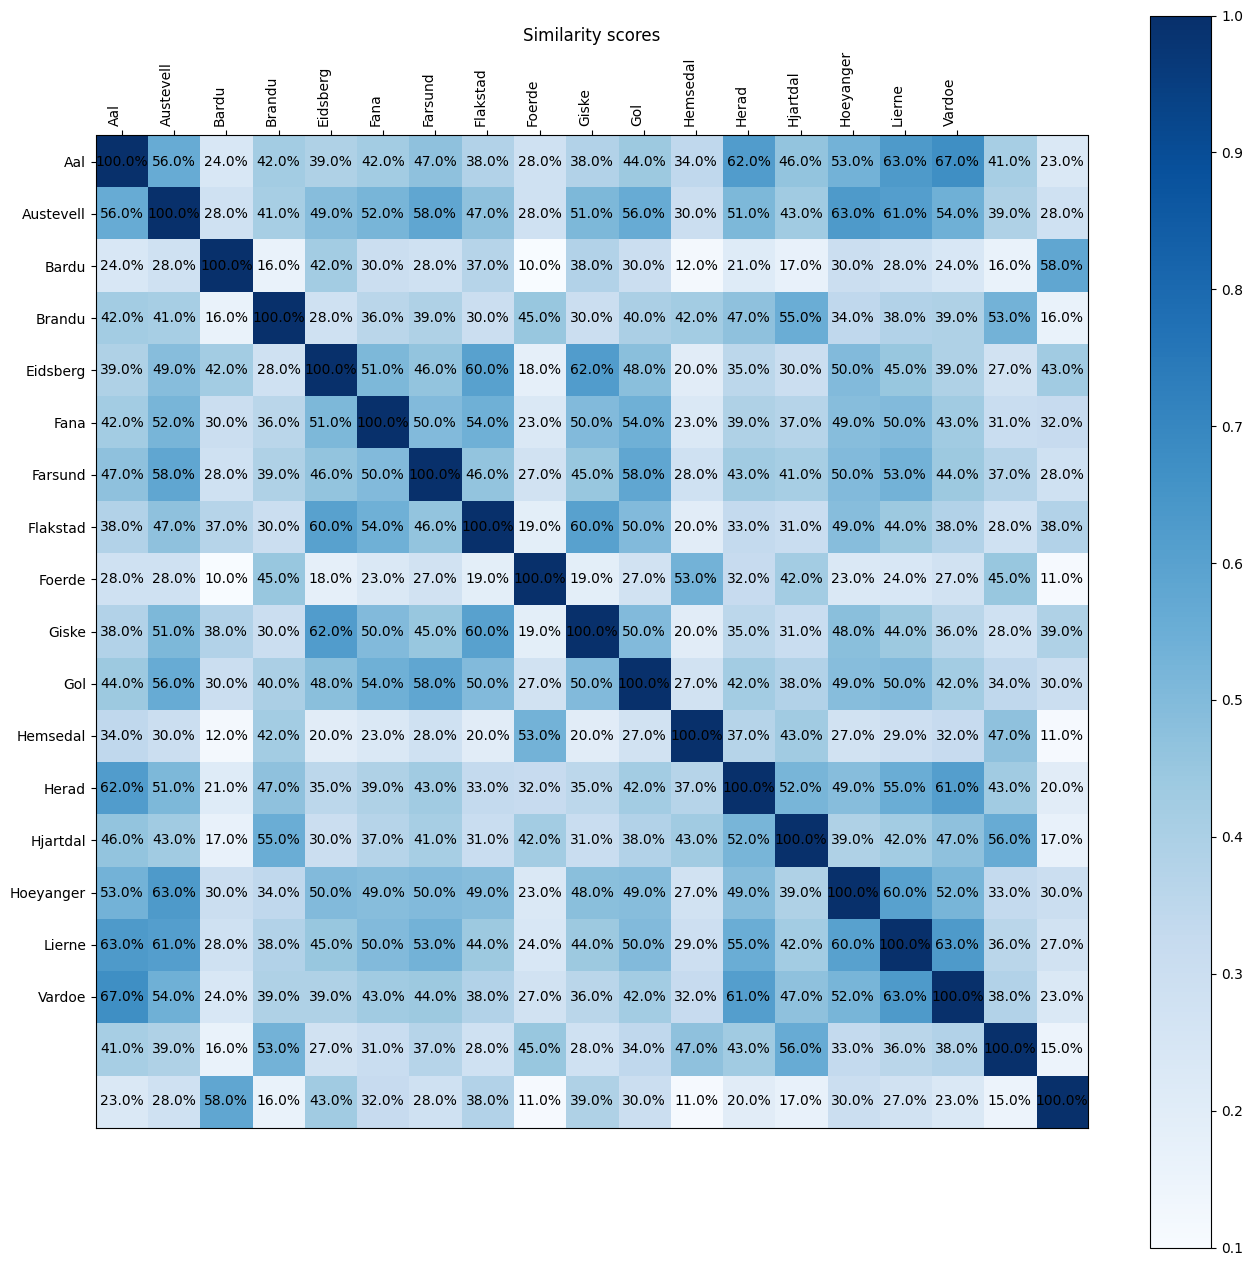

In [5]:
print(scores.shape)

scores_array = np.array(scores)

fig, ax = plt.subplots(figsize=(16, 16))

cmap = plt.cm.get_cmap('Blues')

im = ax.imshow(scores_array, cmap=cmap, interpolation='nearest')

cbar = ax.figure.colorbar(im, ax=ax)

ax.set_title('Similarity scores')

ax.xaxis.tick_top()
ax.set_xticks(np.arange(len(names)))
ax.set_yticks(np.arange(len(names)))
ax.set_xticklabels(names)
ax.set_yticklabels(names)

plt.setp(ax.get_xticklabels(), rotation=90, ha='right')

for i in range(len(scores_array)):
    for j in range(len(scores_array[i])):
        text = ax.text(j, i, f'{scores_array[i,j]*100:.1f}%', ha='center', va='center', color='black')

plt.show()
